# Chapter 02

In [1]:
import pint
ureg = pint.UnitRegistry()

import numpy as np

from sympy import *
init_printing()

# force plots to display in notebook, not new window
%matplotlib inline

## Problem 02.34

A chemical reaction A->B is carried out in a closed vessel. The following data are taken for the concentration of A, Ca(g/L), as a function of time, t (min), from the start of the reaction

> Figure

In [5]:
# note: final point is listed as 200 but actually inf
ts = [0, 36, 65, 100, 160, 200]
Cas = [0.1823, 0.1453, 0.1216, 0.1025, 0.0795, 0.0495]
Ca0 = Cas[0]
Cae = Cas[5]

A proposed reaction mechanism predicts that Ca and t should be related by the expression

$$ \ln ((Ca - Cae)/(Ca0 - Cae)) = -kt $$

where $k$ is the **reaction rate constant**

(a) Do the data support this prediction? If so determine the value of k. (Use a semi plot in your solution of this problem.)

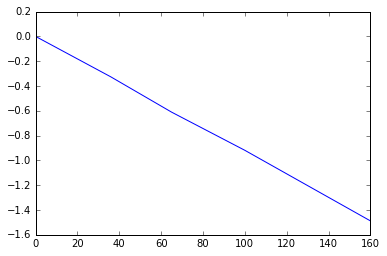

In [30]:
import matplotlib.pyplot as plt
Ca = Function('Ca')
x = symbols('x')
Ca = log((x - Cae)/(Ca0 - Cae))

# removing last point since it can't print inf
newts = [0, 36, 65, 100, 160]
newCas = [log((Cas[0] - Cae)/(Ca0 - Cae)),
         log((Cas[1] - Cae)/(Ca0 - Cae)),
         log((Cas[2] - Cae)/(Ca0 - Cae)),
         log((Cas[3] - Cae)/(Ca0 - Cae)),
         log((Cas[4] - Cae)/(Ca0 - Cae))]

plt.plot(newts, newCas)
plt.show()

In [51]:
k = -(newCas[4] - newCas[0])/(newts[4] - newts[0])
print(k * ureg.minute)

0.00929779284612611 minute


(b) If the tank volume is 30.5 gallons and there is no B in the tank at t = 0, how much B(g) does the take contain after two hours?

In [57]:
# ln((Ca - Cae)/(Ca0 - Cae)) = -kt -> Ca = (Ca0 - Cae)*e^(-kt) + Cae
# Ca = (0.1823 - 0.0495)*e^((-9.3*10^-3)*120) + 0.0495 = 9.30*10^-2 g/L
Ca = Function('Ca')
t = symbols('t')
Ca = (Ca0 - Cae)*exp(-k*t) + Cae
Ca

In [58]:
Ca.subs(t, 120)

In [64]:
# C = mass/Vol = m/V
# m = C*V
C = 0.0930151474841479 * ureg.gram/ureg.liter
V = 30.5 * ureg.gallons
m = C*V
m.to(ureg.gram)

<Quantity(10.739069378998236, 'gram')>